*Christian Camilo Urcuqui López*

**Content**

+ [Data](#Data)
+ [EDA](#Exploratory-Data-Analysis)
+ [Preprocess](#Preprocess)
+ [Modeling](#Modeling)
    + [Base-model](#Base-model)
    + [Deep-Learning-Model](#Deep-Learning-Model)
+ [Pipeline](#Pipeline)
+ [Deployment](#Deployment)

## Data

Data Set with the football matches of the Spanish league of the 1st and 2nd division from the
1970-71 to 2016-17 season.

This file contains information about a football matches with the follow features:
+ id (4808): Unique identifier of football match
+ season (1977-78): Season in which the match was played
+ division (1): División in which the match was played (1st '1', 2nd '2')
+ round (8): round in which the match was played
+ localTeam (Rayo Vallecano): Local Team name
+ visitorTeam (Real Madrid): Visitor Team name
+ localGoals (3): Goals scored by the local team
+ visitorGoals (2): Goals scored by the visitor team
+ fecha (30/10/1977): Date in which the match was played
+ date (247014000): Timestamp in which the match was played


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("FMEL_Dataset.csv")

## Exploratory Data Analysis

In [2]:
df.head(2)

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp
0,1,1970-71,1,1,Athletic Club,Barcelona,1,1,12/09/1970,21942000
1,2,1970-71,1,1,Las Palmas,Atletico de Madrid,1,1,12/09/1970,21942000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36305 entries, 0 to 36304
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            36305 non-null  int64 
 1   season        36305 non-null  object
 2   division      36305 non-null  int64 
 3   round         36305 non-null  int64 
 4   localTeam     36305 non-null  object
 5   visitorTeam   36305 non-null  object
 6   localGoals    36305 non-null  int64 
 7   visitorGoals  36305 non-null  int64 
 8   date          36305 non-null  object
 9   timestamp     36305 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 2.8+ MB


In [14]:
df["date"] = pd.to_datetime(df.date)

In [12]:
"how many local teams are in the datasets?: {}".format(len(df.localTeam.unique()))

'how many local teams are in the datasets?: 114'

In [15]:
"how many visitor teams are in the datasets?: {}".format(len(df.visitorTeam.unique()))

'how many visitor teams are in the datasets?: 114'

In [41]:
df.loc[:,list(set(df.columns) - set(["timestamp", "id"]))].describe()

,visitorGoals,division,round,localGoals
count,36305.00000,36305.000000,36305.000000,36305.000000
mean,0.93494,1.537557,19.845861,1.516706
std,1.00889,0.498594,11.273393,1.263186
min,0.00000,1.000000,1.000000,0.000000
25%,0.00000,1.000000,10.000000,1.000000
50%,1.00000,2.000000,20.000000,1.000000
75%,1.00000,2.000000,29.000000,2.000000
max,8.00000,2.000000,44.000000,10.000000


In [56]:
pd.Series(df.visitorTeam.unique()).isin(df.localTeam).count()

114

In [53]:
pd.Series(df.localTeam.unique()).isin(df.visitorTeam).count()

114

There are no problems with incoherences in the team's names

In [58]:
pd.crosstab(df["round"], df.division).T

round,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
division,,,,,,,,,,,,,,,,,,,,,
1,454,454,454,454,454,454,454,454,454,454,...,311,311,311,311,31,31,31,31,9,9
2,489,489,489,489,489,489,489,489,489,489,...,489,489,489,489,229,229,229,229,9,9


In [62]:
print(df.date.min())
print(df.date.max())

1970-01-11 00:00:00
2017-12-05 00:00:00


In [73]:
df.date.dt.year.value_counts().sort_index()

1970    290
1971    597
1972    733
1973    686
1974    658
1975    685
1976    706
1977    687
1978    666
1979    686
1980    722
1981    684
1982    669
1983    695
1984    714
1985    687
1986    704
1987    731
1988    779
1989    782
1990    738
1991    761
1992    739
1993    781
1994    741
1995    828
1996    820
1997    894
1998    780
1999    885
2000    819
2001    885
2002    768
2003    874
2004    852
2005    843
2006    831
2007    853
2008    820
2009    833
2010    851
2011    854
2012    863
2013    842
2014    820
2015    852
2016    842
2017    475
Name: date, dtype: int64

In [79]:
"is there any difference between the years of each division? {}".format(set(df[df.division == 1].date.dt.year.unique()) - set(df[df.division == 2].date.dt.year.unique()))

'is there any difference between the years of each division? set()'

In [2]:
import numpy as np
df["winner"] = np.where(df.localGoals > df.visitorGoals, df.localTeam, df.visitorTeam)
df["winner"] = np.where(df.localGoals == df.visitorGoals, "draw" , df.winner)

which is more likely to be champion in the 2018 season?

In [15]:
df[df.date >= "2017"].head()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp,winner
35622,35623,2016-17,1,16,Valencia,Real Madrid,2,1,2017-02-22,1487718000,Valencia
35623,35624,2016-17,1,17,Espanyol,Deportivo,1,1,2017-06-01,1483657200,draw
35624,35625,2016-17,1,17,Real Madrid,Granada,5,0,2017-07-01,1483743600,Real Madrid
35625,35626,2016-17,1,17,Eibar,Atletico de Madrid,0,2,2017-07-01,1483743600,Atletico de Madrid
35626,35627,2016-17,1,17,Las Palmas,Sporting de Gijon,1,0,2017-07-01,1483743600,Las Palmas


In [26]:
print(df[df.date.dt.year >= 2017].shape)
df[df.date.dt.year >= 2017].winner.value_counts().head(5)

(475, 11)


draw                  127
Barcelona              18
Real Madrid            18
Atletico de Madrid     15
Levante                14
Name: winner, dtype: int64

C:\Users\Usuario\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='localTeam', ylabel='count'>

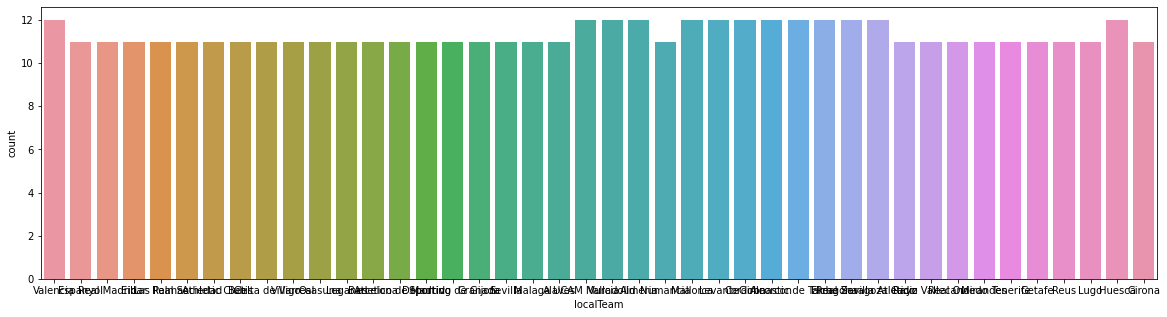

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(20,5))
sns.countplot(df_copy[df_copy.index >= "2017"].localTeam)

C:\Users\Usuario\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='visitorTeam', ylabel='count'>

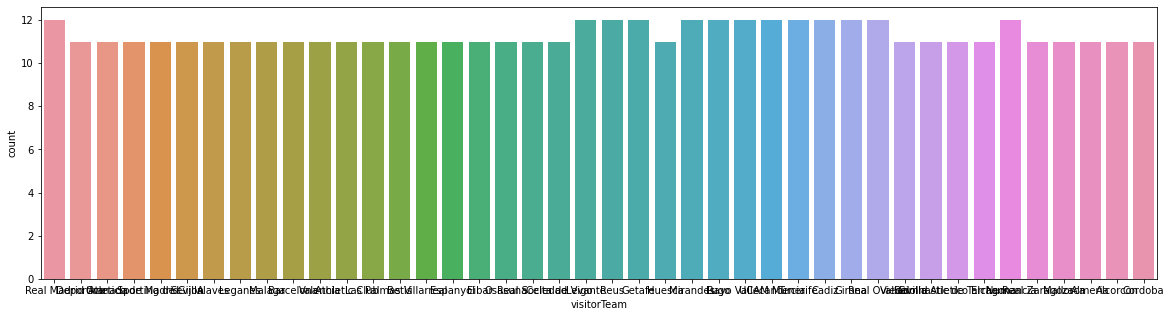

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(20,5))
sns.countplot(df_copy[df_copy.index >= "2017"].visitorTeam)

In [25]:
print(df[df.date.dt.year == 2016].shape)
df[df.date.dt.year == 2016].winner.value_counts().head(5)

(842, 11)


draw                  239
Real Madrid            28
Barcelona              27
Atletico de Madrid     24
Girona                 22
Name: winner, dtype: int64

In [27]:
print(df[df.date.dt.year == 2015].shape)
df[df.date.dt.year == 2015].winner.value_counts().head(5)

(852, 11)


draw                  235
Barcelona              30
Real Madrid            28
Atletico de Madrid     24
Sevilla                21
Name: winner, dtype: int64

<AxesSubplot:xlabel='date', ylabel='points'>

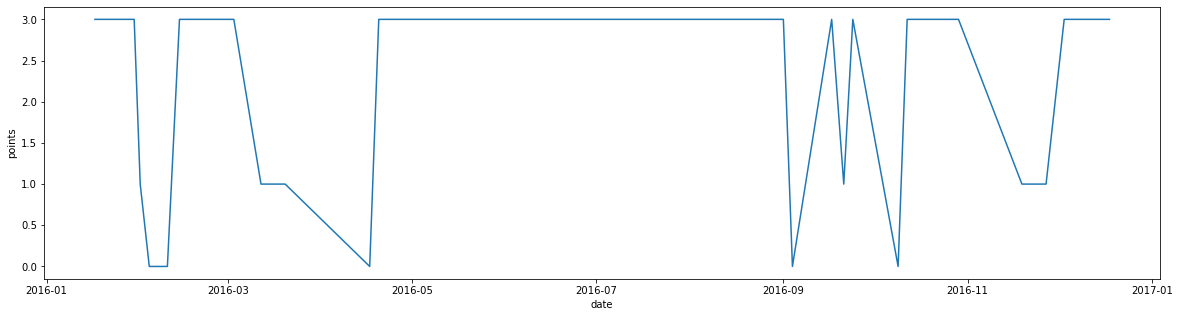

In [105]:
df_bar = df[(df.visitorTeam == "Barcelona") | (df.localTeam == "Barcelona")].copy()
df_bar["points"] = np.where(df_bar.winner == "Barcelona", 3, 0)
df_bar["points"] = np.where(df_bar.winner == "draw", 1, df_bar.points)
df_bar.set_index(df_copy.date, inplace=True)
figure = plt.figure(figsize=(20,5))
sns.lineplot(data=df_bar[df_bar.date.dt.year == 2016], x="date", y="points")

<AxesSubplot:xlabel='date', ylabel='points'>

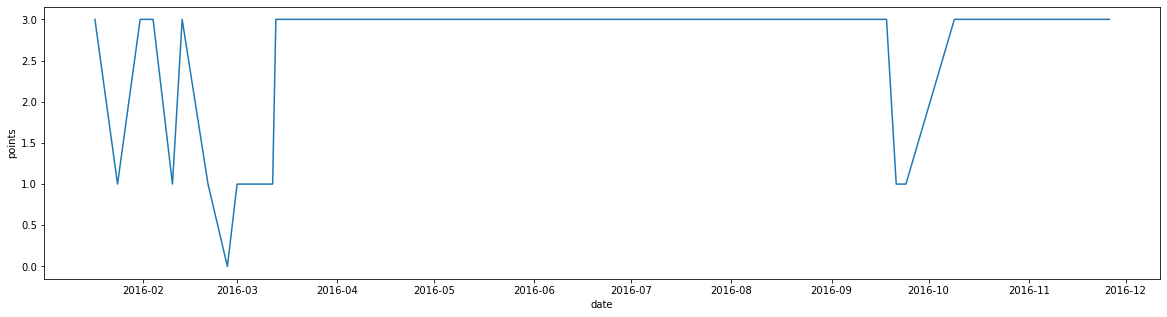

In [106]:
df_mad = df[(df.visitorTeam == "Real Madrid") | (df.localTeam == "Real Madrid")].copy()
df_mad["points"] = np.where(df_mad.winner == "Real Madrid", 3, 0)
df_mad["points"] = np.where(df_mad.winner == "draw", 1, df_mad.points)
df_mad.set_index(df_mad.date, inplace=True)
figure = plt.figure(figsize=(20,5))
sns.lineplot(data=df_mad[df_mad.date.dt.year == 2016], x="date", y="points")

In [112]:
print("Barcelona's points during 2016: {}".format(df_bar[df_bar.date.dt.year == 2016].points.sum()))
print("Real Madrid's points during 2016: {}".format(df_mad[df_mad.date.dt.year == 2016].points.sum()))

Barcelona's points during 2016: 87
Real Madrid's points during 2016: 91


In [114]:
print("Barcelona's points during 2017: {}".format(df_bar[df_bar.date.dt.year == 2017].points.sum()))
print("Real Madrid's points during 2017: {}".format(df_mad[df_mad.date.dt.year == 2017].points.sum()))

Barcelona's points during 2017: 56
Real Madrid's points during 2017: 56


In [121]:
df.set_index(df.date, inplace=True)

**Notes**

+ there are two divisions 
+ the maximum number of rounds is 44 for both divisions
+ the dates are between 1970-2017
+ the seasons are one year less than the actual date from the match

**Conclusions**

+ the are no NaN in the dataset
+ fecha is not a feature in the dataset, a variable that was mentioned on the text
+ the years do not have the same quantity of football matches

## Preprocess

In [3]:
import numpy as np

df["date"] = pd.to_datetime(df.date)
df.set_index(df.date, inplace=True)

df["winner"] = np.where(df.localGoals > df.visitorGoals, df.localTeam, df.visitorTeam)
df["winner"] = np.where(df.localGoals == df.visitorGoals, "draw" , df.winner)

In [4]:
df.duplicated().sum()

0

In [5]:
X_train = df[(df.date.dt.year >= 2015) & (df.date.dt.year < 2017)].loc[:, list(set(df.columns) - set(["timestamp", "id", "winner", "season", "date", "localGoals", "visitorGoals"]))]
y_train = df[(df.date.dt.year >= 2015) & (df.date.dt.year < 2017)].pop("winner")
print(X_train.shape)
print(y_train.shape)

(1694, 4)
(1694,)


In [6]:
X_train.columns

Index(['round', 'localTeam', 'visitorTeam', 'division'], dtype='object')

In [10]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(X_train.select_dtypes("object"))

X_transformed = pd.DataFrame(enc.transform(X_train.select_dtypes("object")).toarray(), columns= enc.get_feature_names())

In [11]:
import joblib

joblib.dump(enc, "onehotencoder.joblib")

['onehotencoder.joblib']

In [28]:
X_train = pd.concat([X_transformed.set_index(X_train.index), X_train.select_dtypes(int)], axis=1)
print(X_train.shape)

del X_transformed

(1694, 100)


In [29]:
X_test = df[(df.date.dt.year == 2017)].loc[:, list(set(df.columns) - set(["timestamp", "id", "winner", "season", "date", "localGoals", "visitorGoals"]))]

X_transformed = pd.DataFrame(enc.transform(X_test.select_dtypes("object")).toarray(), columns= enc.get_feature_names())

X_test = pd.concat([X_transformed.set_index(X_test.index), X_test.select_dtypes(int)], axis=1)

del X_transformed


In [30]:
# from sklearn.preprocessing import normalize
# from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

# transformer = Normalizer().fit(X_train)

X_train_tr = scaler.transform(X_train)
# X_train_tr = normalize(X_train, norm='l1', axis=1)
# X_train_tr = transformer.transform(X_train)

X_test_tr = scaler.transform(X_test)
# X_test_tr = transformer.transform(X_test)
# X_test_tr = normalize(X_test, norm='l1', axis=1)


In [31]:
import joblib

joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [31]:
X_train_tr

array([[-0.15749091, -0.1409523 , -0.16138408, ..., -0.14943062,
        -0.1594482 , -0.15148221],
       [-0.15749091, -0.1409523 , -0.16138408, ..., -0.14943062,
        -0.1594482 , -0.15148221],
       [-0.15749091, -0.1409523 , -0.16138408, ..., -0.14943062,
        -0.1594482 , -0.15148221],
       ...,
       [-0.15749091, -0.1409523 , -0.16138408, ..., -0.14943062,
        -0.1594482 , -0.15148221],
       [-0.15749091, -0.1409523 , -0.16138408, ..., -0.14943062,
        -0.1594482 , -0.15148221],
       [-0.15749091, -0.1409523 , -0.16138408, ..., -0.14943062,
        -0.1594482 , -0.15148221]])

In [32]:
df.winner.isna().any()

False

In [33]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
labelencoder.fit(y_train)

LabelEncoder()

In [34]:
y_test = df[(df.date.dt.year == 2017)].pop("winner")

In [35]:
y_train_tr = labelencoder.transform(y_train)
y_test_tr = labelencoder.transform(y_test)

In [36]:
(labelencoder.transform(y_train) == 0).any()

True

## Modeling

### Base model

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [20]:
# the implementation was taken from 
# https://stackoverflow.com/questions/57015499/how-to-use-dynamic-time-warping-with-knn-in-python
# https://towardsdatascience.com/k-nn-based-time-series-classification-e5d761d01ea2
from scipy.spatial import distance

def DTW(a, b):   
    an = a.size
    bn = b.size
    pointwise_distance = distance.cdist(a.reshape(-1,1),b.reshape(-1,1))
    cumdist = np.matrix(np.ones((an+1,bn+1)) * np.inf)
    cumdist[0,0] = 0

    for ai in range(an):
        for bi in range(bn):
            minimum_cost = np.min([cumdist[ai, bi+1],
                                   cumdist[ai+1, bi],
                                   cumdist[ai, bi]])
            cumdist[ai+1, bi+1] = pointwise_distance[ai,bi] + minimum_cost

    return cumdist[an, bn]

In [21]:
%time
clf = KNeighborsClassifier(n_neighbors= 2, metric=DTW)
clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(metric=<function DTW at 0x0000020F4AC12AF8>, n_neighbors=2)

In [ ]:
# %time
# parameters = {'n_neighbors':[2, 4]}
# clf = GridSearchCV(KNeighborsClassifier(metric=DTW), parameters, cv=3, verbose=1)
# clf.fit(X_train, y_train)

Wall time: 0 ns
Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [17]:
X_test[:50].shape

(50, 100)

In [18]:
%time
result = clf.predict(X_test[:50])

Wall time: 0 ns


In [24]:
pd.DataFrame(result).to_csv("result.csv")

In [11]:
import pandas as pd
result = pd.read_csv("result.csv", index_col=0)

In [18]:
from sklearn.metrics import classification_report

print(classification_report(result.values, y_test[:50]))

                    precision    recall  f1-score   support

            Alaves       0.00      0.00      0.00         0
     Athletic Club       0.00      0.00      0.00         0
Atletico de Madrid       1.00      0.07      0.12        46
         Barcelona       0.00      0.00      0.00         0
             Betis       0.00      0.00      0.00         0
     Celta de Vigo       0.00      0.00      0.00         0
             Eibar       0.00      0.00      0.00         0
          Espanyol       0.00      0.00      0.00         0
           Granada       0.00      0.00      0.00         0
        Las Palmas       0.00      0.00      0.00         0
          Mirandes       0.00      0.00      0.00         2
       Real Madrid       0.00      0.00      0.00         0
     Real Sociedad       0.00      0.00      0.00         0
           Sevilla       0.00      0.00      0.00         0
          Valencia       0.00      0.00      0.00         0
        Villarreal       0.00      0.00

In [22]:
import joblib

joblib.dump(clf, "model.joblib")

['model.joblib']

### Deep Learning Model

In [37]:
from tensorflow import keras
import tensorflow as tf
import numpy as np

In [38]:
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [39]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [40]:
# sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
# tf.compat.v1.keras.backend.set_session(sess)

In [41]:
x_train = X_train_tr.reshape((X_train_tr.shape[0], X_train_tr.shape[1], 1))
x_test = X_test_tr.reshape((X_test_tr.shape[0], X_test_tr.shape[1], 1))
print(x_train.shape)
print(x_test.shape)

(1694, 100, 1)
(475, 100, 1)


In [42]:
num_classes = len(np.unique(y_train_tr))
print(num_classes)

51


In [43]:
print("input shape: {}".format(x_train.shape[1:]))
print("x train shape: {}".format(x_train.shape))

input shape: (100, 1)
x train shape: (1694, 100, 1)


In [44]:
# https://arxiv.org/abs/1611.06455

def architecture(input_shape):
    input_layer = keras.layers.Input(input_shape)
    
    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
#     conv1 = keras.layers.Dropout(0.2)(conv1)
    
    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
#     conv2 = keras.layers.Dropout(0.2)(conv2)
    
    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    
    gap = keras.layers.GlobalAveragePooling1D()(conv3)
    
    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)
    
    return keras.models.Model(inputs=input_layer, outputs=output_layer)


In [45]:
model = architecture(input_shape=x_train.shape[1:])

In [46]:
x_train.shape[1:]

(100, 1)

In [42]:
epochs = 100
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=1e-8
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

# loss_function = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# optimizer = tf.keras.optimizers.Adam(lr=1e-8)
# loss_function = tf.reduce_mean(
#     tf.nn.sigmoid_cross_entropy_with_logits(
#         logits=tf.reshape(ylogits, [-1]),
#         labels=tf.cast(num_classes, dtype=tf.float32)))

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],)

history = model.fit(
    x_train,
    y_train_tr,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Train on 1355 samples, validate on 339 samples
Epoch 1/100
1355/1355 [==============================] - 5s 3ms/sample - loss: 3.3031 - sparse_categorical_accuracy: 0.2768 - val_loss: 3.4975 - val_sparse_categorical_accuracy: 0.2920
Epoch 2/100
1355/1355 [==============================] - 1s 783us/sample - loss: 3.2923 - sparse_categorical_accuracy: 0.2768 - val_loss: 3.5321 - val_sparse_categorical_accuracy: 0.2920
Epoch 3/100
1355/1355 [==============================] - 1s 593us/sample - loss: 3.2873 - sparse_categorical_accuracy: 0.2768 - val_loss: 3.5625 - val_sparse_categorical_accuracy: 0.2920
Epoch 4/100
1355/1355 [==============================] - 1s 641us/sample - loss: 3.2820 - sparse_categorical_accuracy: 0.2768 - val_loss: 3.5863 - val_sparse_categorical_accuracy: 0.2920
Epoch 5/100
1355/1355 [==============================] - 1s 632us/sample - loss: 3.2758 - sparse_categorical_accuracy: 0.2768 - val_loss: 3.6189 - val_sparse_categorical_accuracy: 0.2920
Epoch 6/100
1355/135

1355/1355 [==============================] - 1s 830us/sample - loss: 2.9286 - sparse_categorical_accuracy: 0.2856 - val_loss: 4.3866 - val_sparse_categorical_accuracy: 0.2861
Epoch 45/100
1355/1355 [==============================] - 1s 923us/sample - loss: 2.9182 - sparse_categorical_accuracy: 0.2819 - val_loss: 4.5548 - val_sparse_categorical_accuracy: 0.2655
Epoch 46/100
1355/1355 [==============================] - 1s 713us/sample - loss: 2.9129 - sparse_categorical_accuracy: 0.2834 - val_loss: 4.5843 - val_sparse_categorical_accuracy: 0.2891
Epoch 47/100
1355/1355 [==============================] - 1s 849us/sample - loss: 2.9051 - sparse_categorical_accuracy: 0.2856 - val_loss: 4.1950 - val_sparse_categorical_accuracy: 0.2979
Epoch 48/100
1355/1355 [==============================] - 1s 1ms/sample - loss: 2.9006 - sparse_categorical_accuracy: 0.2841 - val_loss: 4.2394 - val_sparse_categorical_accuracy: 0.3009
Epoch 49/100
1355/1355 [==============================] - 1s 950us/sample -

In [43]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test_tr)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

475/475 [==============================] - 1s 1ms/sample - loss: 3.4920 - sparse_categorical_accuracy: 0.2674
Test accuracy 0.26736844
Test loss 3.4920460445002504


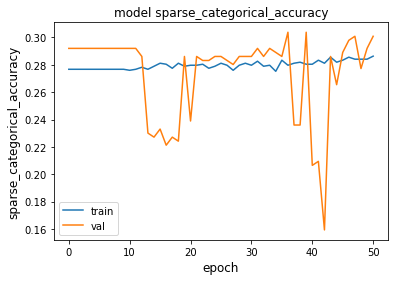

In [44]:
import matplotlib.pyplot as plt

metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

## Pipeline

In [53]:
# !pip install -U tfx

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("FMEL_Dataset.csv")

df["date"] = pd.to_datetime(df.date)
df.set_index(df.date, inplace=True)

df["winner"] = np.where(df.localGoals > df.visitorGoals, df.localTeam, df.visitorTeam)
df["winner"] = np.where(df.localGoals == df.visitorGoals, "draw" , df.winner)

X_train = df[(df.date.dt.year >= 2015) & (df.date.dt.year < 2017)].loc[:, list(set(df.columns) - set(["timestamp", "id", "winner", "season", "date", "localGoals", "visitorGoals"]))]
y_train = df[(df.date.dt.year >= 2015) & (df.date.dt.year < 2017)].pop("winner")

In [2]:
# https://arxiv.org/abs/1611.06455

def architecture(input_shape):
    input_layer = keras.layers.Input(input_shape)
    
    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
#     conv1 = keras.layers.Dropout(0.2)(conv1)
    
    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
#     conv2 = keras.layers.Dropout(0.2)(conv2)
    
    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    
    gap = keras.layers.GlobalAveragePooling1D()(conv3)
    
    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)
    
    return keras.models.Model(inputs=input_layer, outputs=output_layer)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
import tensorflow as tf
import numpy as np

categorical_cols = X_train.select_dtypes("object")

categorical_transformer = Pipeline(steps=[    
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])


preprocessor = ColumnTransformer(
    transformers=[        
        ('cat', categorical_transformer, categorical_cols)        
    ])

def create_model(optimizer="adam",loss="sparse_categorical_crossentropy"):    

    callbacks = [
        keras.callbacks.ModelCheckpoint(
            "best_model.h5", save_best_only=True, monitor="val_loss"
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.5, patience=20, min_lr=1e-8
        ),
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
    ]

    model_i = architecture(input_shape=(100, 1))

    model_i.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=["sparse_categorical_accuracy"],)



epochs = 100
batch_size = 32

model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=1)

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('scaler', StandardScaler()),                              
                              ('model', model)
                             ])

history = my_pipeline.fit(X_train,y_train)


## Deployment

In [12]:
# !pip install fastapi

In [14]:
# !pip install "uvicorn[standard]"

In [ ]:
# %load app.py
from typing import Optional

from fastapi import FastAPI

from pydantic import BaseModel

import joblib

import pandas as pd

from tensorflow import keras

app = FastAPI()


class Match(BaseModel):
    round_: int
    localTeam: str
    visitorTeam: str
    division: int    

@app.get("/")
def read_root():
    return {"Hello": "World"}


@app.get("/pred/")
def pred_match(match: Match):
    enc = joblib.load("onehotencoder.joblib")
    
    data = pd.DataFrame.from_dict({"localTeam": [match.localTeam], "visitorTeam": [ match.visitorTeam], "round": [match.round_], "division":match.division})
    
    X = pd.DataFrame(enc.transform(X_train.select_dtypes("object")).toarray(), columns= enc.get_feature_names())
    
    X = pd.concat([X.set_index(data.index), data.select_dtypes(int)], axis=1)
    
    scaler = joblib.load("scaler.joblib") 
    
    X_train_tr = scaler.transform(X)
        
    model = keras.models.load_model("best_model.h5")
    
    result = model.predict(X_train_tr)
    
    return {"winner": result}
#     return {"round": match.round_, "localTeam": match.localTeam, "visitorTeam": match.visitorTeam, "division": match.division}